>**::: Uber Data Analysis Project :::**

In [28]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dataset = pd.read_csv('UberDataset.csv')
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [30]:
# shape of dataset
dataset.shape

(1156, 7)

In [31]:
# info 
dataset.info()  # PURPOSE has only 653 non-null values, meaning 503 rows have missing values in this column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Precessing

In [32]:
dataset['PURPOSE'].fillna("NOT",inplace=True)

In [33]:
dataset.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [34]:
# converting start_date and end_date data type from object/string to datetime
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],errors='coerce')

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [36]:
# Now , we are going to split start_date column into two new column date and other is time.
from datetime import datetime

dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['END_DATE']).hour

In [37]:
dataset.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,15.0


In [38]:
# Now , creating a new column for Parts of the day Like , Morning , Afternoon , Evening , Night .

# Morning 0 am to 10 am
# Afternoon 10 am to 3 pm.
# Evening 3 pm to 7 pm.
# Night 7 pm to 12 am.

dataset['day-night'] = pd.cut(x=dataset['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [39]:
dataset.head(5)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,15.0,Afternoon


In [40]:
# dropping null value from dataset
dataset.dropna(inplace=True)

In [41]:
dataset.shape

(1131, 10)

In [42]:
# converting category columns into numerical

# from sklearn.preprocessing import LabelEncoder

# le=LabelEncoder()
# dataset['CATEGORY'] = le.fit_transform(dataset['CATEGORY'])

In [43]:
# creating column for Month

dataset['MONTH']=pd.DatetimeIndex(dataset['START_DATE']).month

month_label={
    1.0:'Jan',2.0:'Feb',3.0:'Mar',4.0:'Apr',5.0:'May',6.0:'Jun',
    7.0:'Jul',8.0:'Aug',9.0:'Sep',10.0:'Oct',11.0:'Nov',12.0:'Dec'
}

dataset['MONTH'] = dataset.MONTH.map(month_label)

mon = dataset.MONTH.value_counts(sort=False)

In [44]:
# creating column for week day.

dataset['DAY'] = dataset.START_DATE.dt.weekday
# dataset['DAY']
day_label={
    0:"MON",
    1:"TUES",
    2:"WED",
    3:"THURS",
    4:"FRI",
    5:"SAT",
    6:"SUN"
}

dataset['DAY']=dataset['DAY'].map(day_label)

# Data Visualization

Questions/Problems/Insights

<span style="color:blue;">1. In which cateogry do people book the most uber rides ?</span>
<br>
<span style="color:blue;">2. For which purpose do people book Uber rides the most ?<span>

In [45]:
dataset['CATEGORY'].value_counts()

Business    1057
Personal      74
Name: CATEGORY, dtype: int64

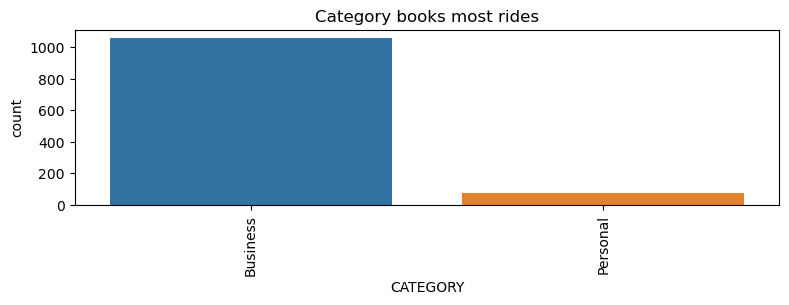

                              Here you can see that Business category book most rides than Perosnal.


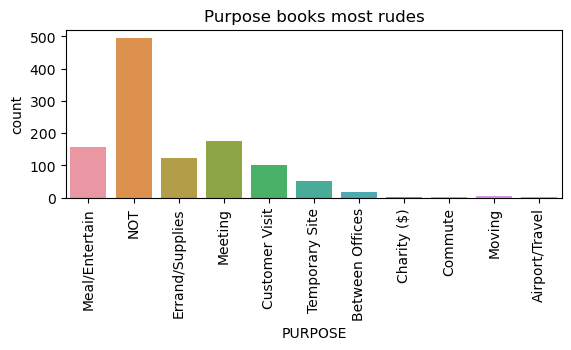

                              Here you can see that Meeting purpose book most rides than other.


In [46]:
plt.figure(figsize=(20,5))

# question - 1
plt.subplot(2,2,1)
plt.title("Category books most rides")
sns.countplot(x='CATEGORY',data=dataset,orient="v")
plt.xticks(rotation=90)
# Saving figure by changing parameter values
plt.savefig("1", bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()

print("                              Here you can see that Business category book most rides than Perosnal.")


# question - 2

plt.subplot(2,1,2)
plt.title("Purpose books most rudes")
sns.countplot(x='PURPOSE',data=dataset,orient="v")
plt.xticks(rotation=90)
# Saving figure by changing parameter values
plt.savefig("2", bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()

print("                              Here you can see that Meeting purpose book most rides than other.")


<span style="color:blue;">3. At what time do people book cabs the most from Uber ?</span>

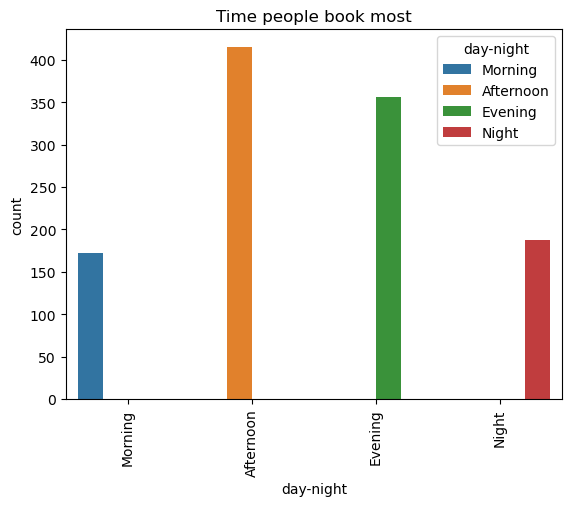

In [47]:
# plt.figure(figsize=(5,5))
plt.title("Time people book most")

sns.countplot(x='day-night',data=dataset,hue='day-night')
plt.xticks(rotation=90)
# Saving figure by changing parameter values
plt.savefig("3", bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()

In [48]:
print(mon)

Jan     61
Feb    114
Mar    111
Apr     53
May     47
Jun    102
Jul    102
Aug    133
Sep     36
Oct    105
Nov    122
Dec    145
Name: MONTH, dtype: int64


<span style="color:blue;">4. In which months do people book Uber rides less frequently ?</span>

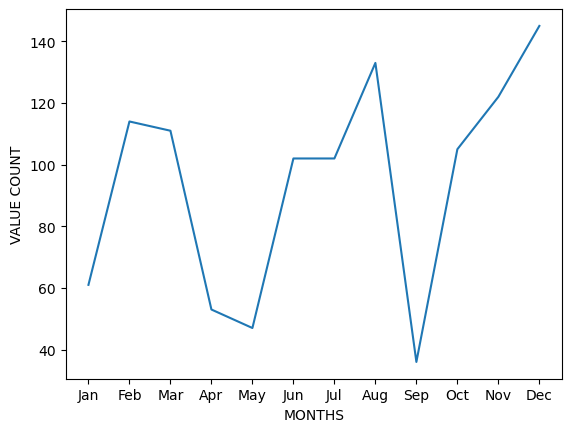

       September has the fewest rides (36), followed by May (49) and April (54).


In [49]:
# df=pd.DataFrame({
#     "MONTHS": mon.values, # har month ka total count.
#     "VALUE COUNT": dataset.groupby('MONTH',sort=False)['MILES'].max() # har month ke max MILES ka value.
# })
p=sns.lineplot(data=mon)
p.set(xlabel="MONTHS",ylabel="VALUE COUNT")
# Saving figure by changing parameter values
plt.savefig("4", bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()
print("       September has the fewest rides (36), followed by May (49) and April (54).")

<span style="color:blue;">5. On which days of the week do people book uber rides the most ?</span>

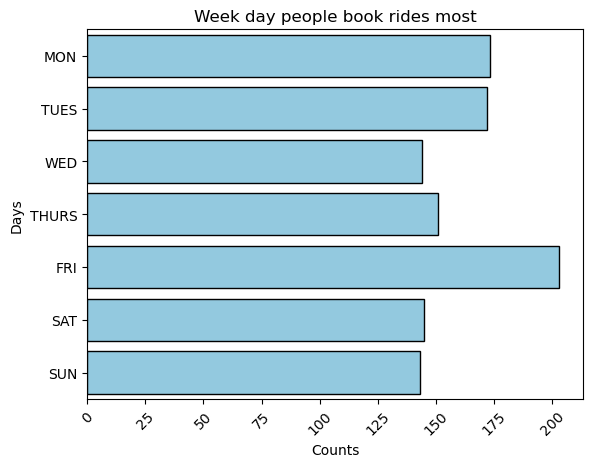

               Friday has the most rides followed by Monday and Tuesday.


In [50]:
# sns.countplot(data=dataset,y="DAY",edgecolor="black",color="skyblue",order=dataset['DAY'].value_counts().index)
day_order=["MON","TUES","WED","THURS","FRI","SAT","SUN"]
sns.countplot(data=dataset,y="DAY",edgecolor="black",color="skyblue",order=day_order)
plt.title("Week day people book rides most", fontsize=12)
plt.xlabel("Counts")
plt.ylabel("Days")
plt.xticks(rotation=45)
# Saving figure by changing parameter values
plt.savefig("5", bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()
print("               Friday has the most rides followed by Monday and Tuesday.")

<span style="color:blue;">6. How manymiled do people usually book a cab for through Uber. ?</span>

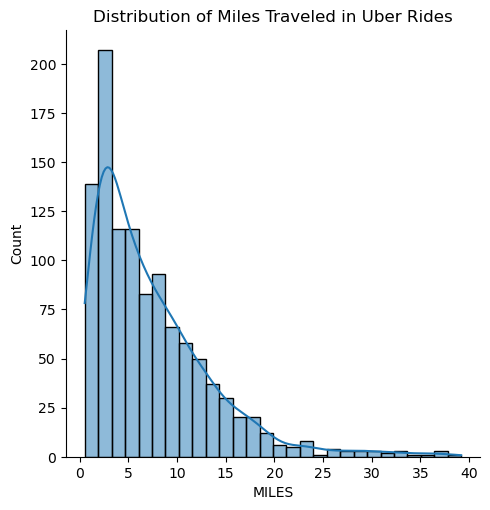

                   Majority Books for 0-5 Miles


In [51]:
milesData = dataset[dataset['MILES']<40]['MILES']
sns.displot(data=dataset,x=milesData,kde=True)
plt.title("Distribution of Miles Traveled in Uber Rides")
plt.ylabel("Count")
plt.xlabel("MILES")
# Saving figure by changing parameter values
plt.savefig("6", bbox_inches="tight",pad_inches=0.3, transparent=True)
plt.show()

print("                   Majority Books for 0-5 Miles")

>** END OF UBER DATA ANALYSIS **